# **"Analysis of Comprehensive Environmental Pollution Index (CEPI) Scores of India”**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/CEPI_Scores_and_Status_of_Moratorium.csv")
print(df.head())

         Status of Moratorium Industrial Cluster / Area          State  \
0  Moratorium has been lifted                      Agra  Uttar Pradesh   
1  Moratorium has been lifted                 Ahmedabad        Gujarat   
2  Moratorium has been lifted             Angul Talcher         Orissa   
3  Moratorium has been lifted                   Asansol    West Bengal   
4  Moratorium has been lifted                Aurangabad    Maharashtra   

   CEPI SCORE-2020  CEPI SCORE-2021  CEPI SCORE-2022  
0            76.48            88.36            68.71  
1            75.28            78.09            69.54  
2            82.09            89.74            72.86  
3            70.20            70.96            56.01  
4            77.44            83.10            68.87  


# **Average CEPI Scores Over the Years**

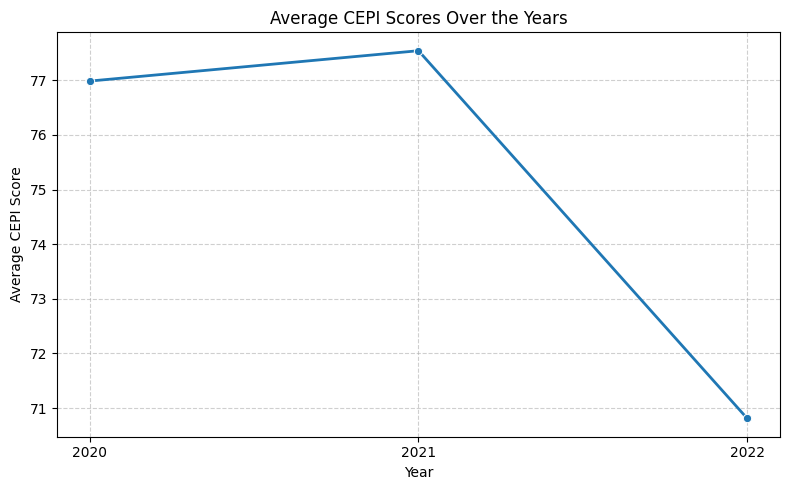

In [ ]:
# Melt the dataframe for the new year columns
df_melted = df.melt(
    id_vars=["Industrial Cluster / Area"],
    value_vars=["CEPI SCORE-2020", "CEPI SCORE-2021", "CEPI SCORE-2022"],
    var_name="Year",
    value_name="CEPI Score"
)
# Extract only the year number
df_melted["Year"] = df_melted["Year"].str.extract(r'(\d{4})')
# Group by year and compute mean CEPI score
df_grouped = df_melted.groupby("Year", as_index=False)["CEPI Score"].mean()
# Plot the average CEPI scores
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="CEPI Score",
    marker='o',
    linewidth=2
)
plt.title("Average CEPI Scores Over the Years")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Average CEPI Score")
plt.tight_layout()
plt.show()

# **Side-by-Side Comparison of Top 5 and Bottom 5 Polluted Clusters for each year**

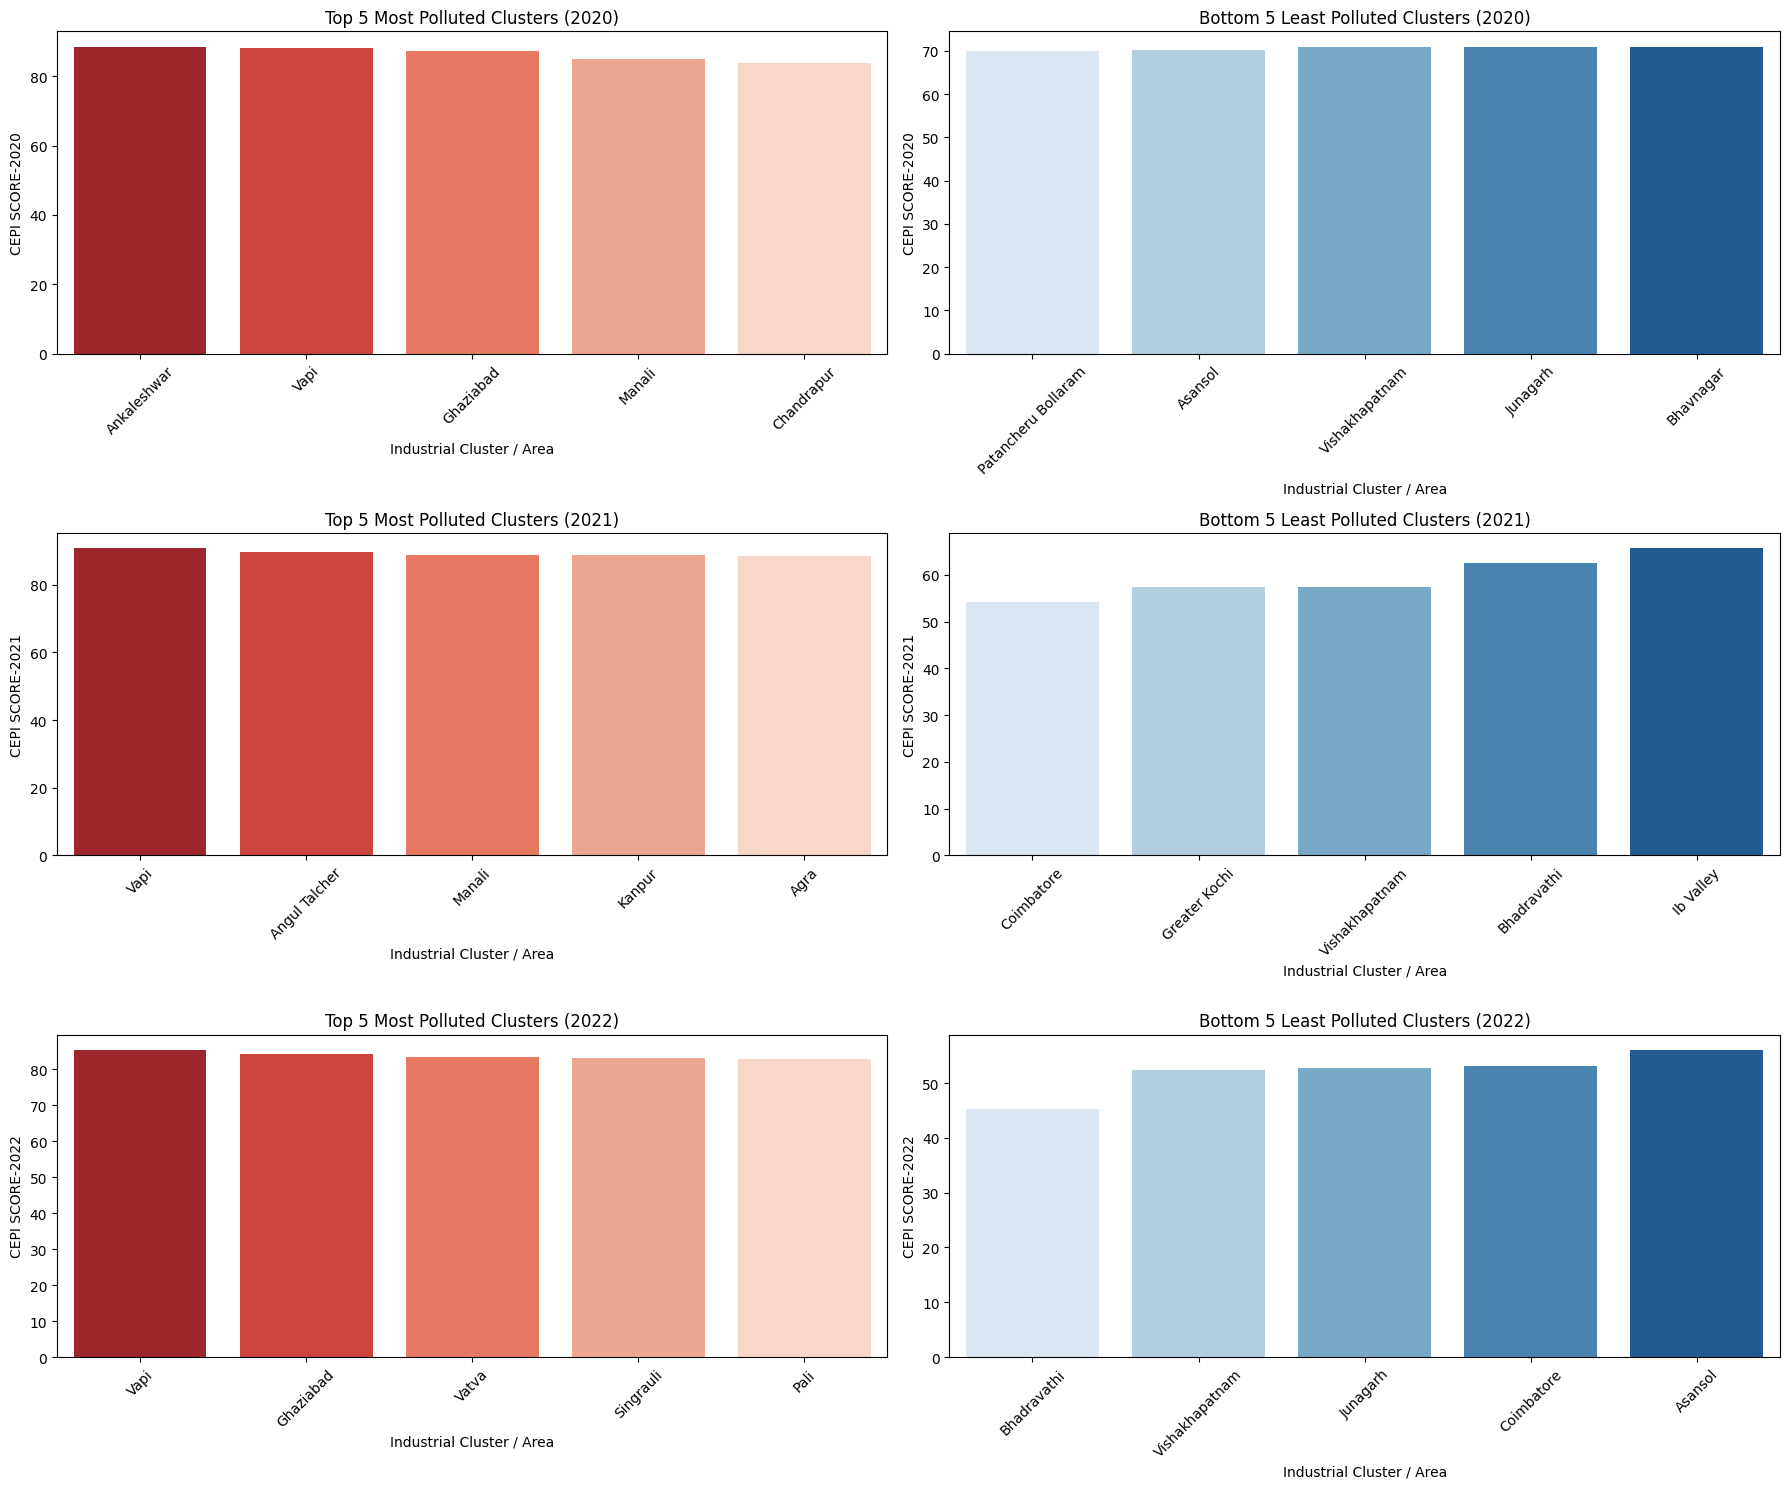

In [ ]:
# Top and bottom 5 for 2020
top_5_2020 = df.sort_values("CEPI SCORE-2020", ascending=False).head(5)
bottom_5_2020 = df.sort_values("CEPI SCORE-2020", ascending=True).head(5)

# Top and bottom 5 for 2021
top_5_2021 = df.sort_values("CEPI SCORE-2021", ascending=False).head(5)
bottom_5_2021 = df.sort_values("CEPI SCORE-2021", ascending=True).head(5)

# Top and bottom 5 for 2022
top_5_2022 = df.sort_values("CEPI SCORE-2022", ascending=False).head(5)
bottom_5_2022 = df.sort_values("CEPI SCORE-2022", ascending=True).head(5)

# Create subplot grid
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# For 2020
sns.barplot(data=top_5_2020, x="Industrial Cluster / Area", y="CEPI SCORE-2020",
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Top 5 Most Polluted Clusters (2020)")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2020, x="Industrial Cluster / Area", y="CEPI SCORE-2020",
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Bottom 5 Least Polluted Clusters (2020)")
axes[0, 1].tick_params(axis='x', rotation=45)

# For 2021
sns.barplot(data=top_5_2021, x="Industrial Cluster / Area", y="CEPI SCORE-2021",
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Top 5 Most Polluted Clusters (2021)")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2021, x="Industrial Cluster / Area", y="CEPI SCORE-2021",
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Bottom 5 Least Polluted Clusters (2021)")
axes[1, 1].tick_params(axis='x', rotation=45)

# For 2022
sns.barplot(data=top_5_2022, x="Industrial Cluster / Area", y="CEPI SCORE-2022",
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[2, 0])
axes[2, 0].set_title("Top 5 Most Polluted Clusters (2022)")
axes[2, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2022, x="Industrial Cluster / Area", y="CEPI SCORE-2022",
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[2, 1])
axes[2, 1].set_title("Bottom 5 Least Polluted Clusters (2022)")
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## **CEPI Score by Moratorium Status**

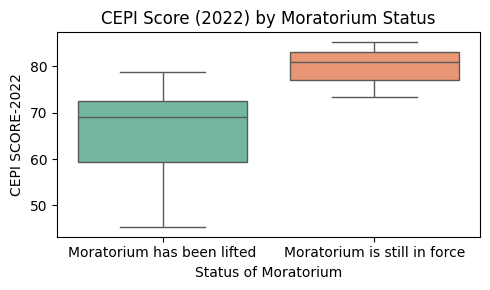

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x="Status of Moratorium", y="CEPI SCORE-2022", hue="Status of Moratorium", palette="Set2", legend=False)
plt.title("CEPI Score (2022) by Moratorium Status")
plt.tight_layout()
plt.show()

## **Average CEPI Score by State (2022)**

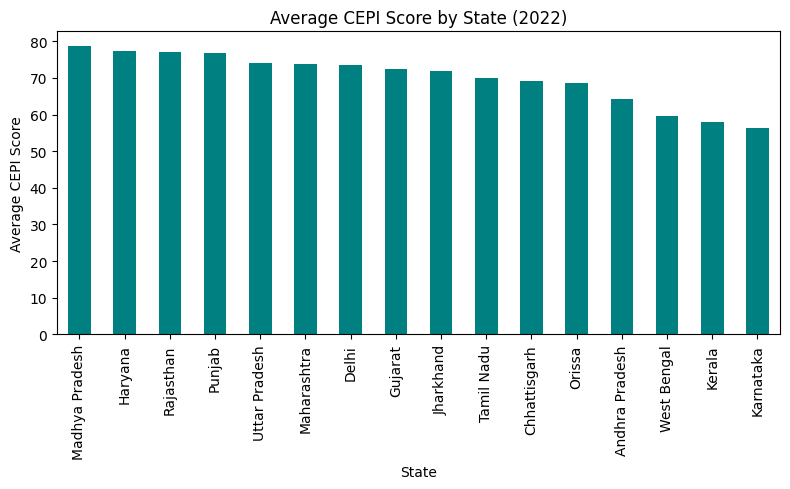

In [ ]:
statewise_avg = df.groupby("State")["CEPI SCORE-2022"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
statewise_avg.plot(kind='bar', color='teal')
plt.title("Average CEPI Score by State (2022)")
plt.ylabel("Average CEPI Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Improved Clusters and Worsened Clusters**

In [ ]:
df["Trend"] = df["CEPI SCORE-2022"] - df["CEPI SCORE-2020"]
improved = df[df["Trend"] < 0].sort_values("Trend").head(5)
worsened = df[df["Trend"] > 0].sort_values("Trend", ascending=False).head(5)

print("Top 5 Improved Clusters:")
print(improved[["Industrial Cluster / Area", "Trend"]])

print("\nTop 5 Worsened Clusters:")
print(worsened[["Industrial Cluster / Area", "Trend"]])

Top 5 Improved Clusters:
   Industrial Cluster / Area  Trend
5                Bhadravathi -27.06
14                    Haldia -21.90
8                 Coimbatore -19.24
27            Vishakhapatnam -18.51
17                  Junagarh -18.07

Top 5 Worsened Clusters:
   Industrial Cluster / Area  Trend
37                   Panipat   9.36
36                      Pali   8.98
41                     Vatva   8.67
31                    Indore   7.49
38       Patancheru Bollaram   5.98


## **Side-by-Side Comparison of CEPI Score Distributions (2020, 2021, 2022)**

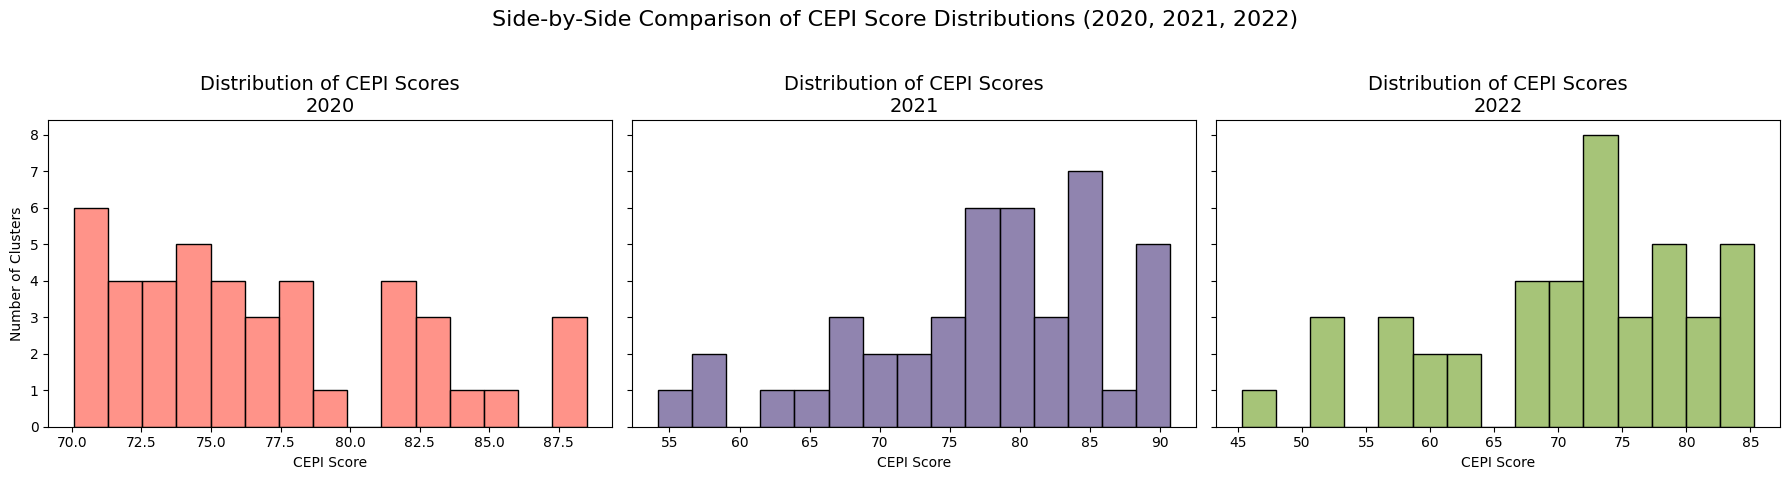

In [ ]:
cepi_years = {
    "CEPI SCORE-2020": "#FF6F61",
    "CEPI SCORE-2021": "#6B5B95",
    "CEPI SCORE-2022": "#88B04B"
}
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, (col, color) in zip(axes, cepi_years.items()):
    sns.histplot(df[col], bins=15, color=color, ax=ax)
    ax.set_title(f"Distribution of CEPI Scores\n{col[-4:]}", fontsize=14)
    ax.set_xlabel("CEPI Score")
    ax.set_ylabel("Number of Clusters")

plt.suptitle("Side-by-Side Comparison of CEPI Score Distributions (2020, 2021, 2022)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Distribution of CEPI Scores (**2022**)

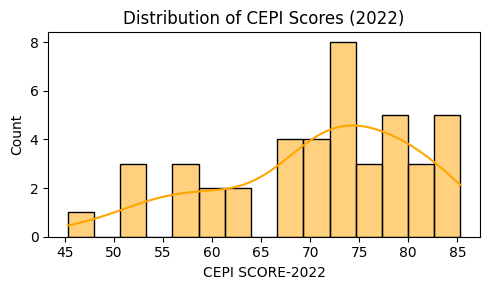

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(df["CEPI SCORE-2022"], kde=True, color='orange', bins=15)
plt.title("Distribution of CEPI Scores (2022)")
plt.tight_layout()
plt.show()

## **Heatmap of CEPI Scores (2020, 2021, 2022) by Industrial Cluster**

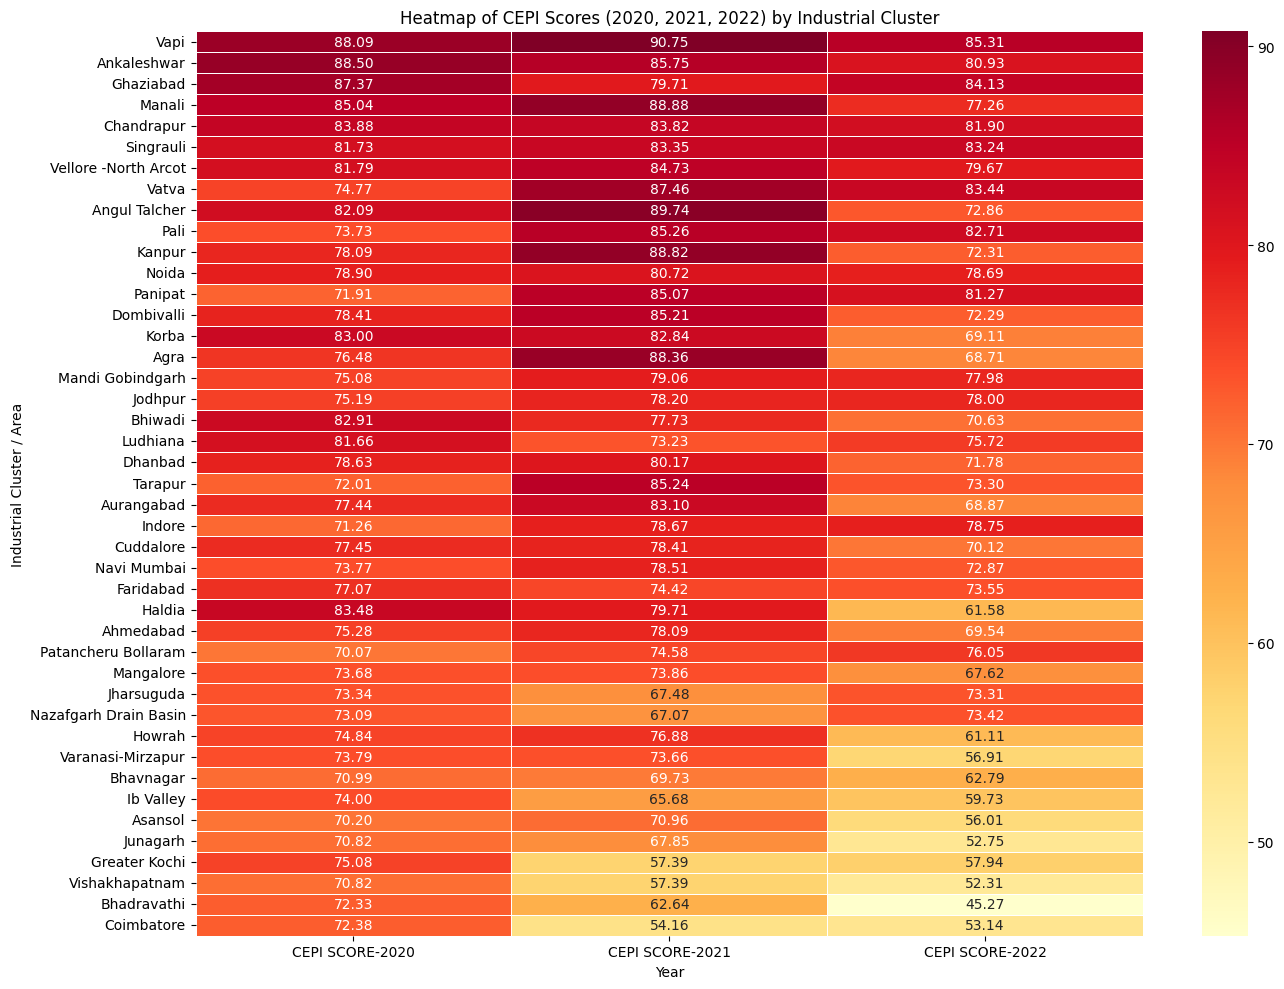

In [ ]:
heat_df = df.set_index("Industrial Cluster / Area")[["CEPI SCORE-2020", "CEPI SCORE-2021", "CEPI SCORE-2022"]]
heat_df["Average"] = heat_df.mean(axis=1)
heat_df = heat_df.sort_values("Average", ascending=False).drop("Average", axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(heat_df, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of CEPI Scores (2020, 2021, 2022) by Industrial Cluster")
plt.xlabel("Year")
plt.ylabel("Industrial Cluster / Area")
plt.tight_layout()
plt.show()